In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [63]:
df0 = pd.read_csv('covid_19_clean_complete_2022.csv')
df = df0.copy()
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [64]:
cond = df['WHO Region'].dropna().index
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', nan, 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [65]:
df.rename(columns={'Country/Region' : 'Country', 'WHO Region' : 'Region'}, inplace=True)
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [66]:
df.isna().sum()

Province/State    149189
Country                0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Region              2319
dtype: int64

In [67]:
country = df.groupby(['Country', 'Date']).sum().reset_index()
country

,Country,Date,Lat,Long,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,33.939110,67.709953,0,0,0,0
1,Afghanistan,2020-01-23,33.939110,67.709953,0,0,0,0
2,Afghanistan,2020-01-24,33.939110,67.709953,0,0,0,0
3,Afghanistan,2020-01-25,33.939110,67.709953,0,0,0,0
4,Afghanistan,2020-01-26,33.939110,67.709953,0,0,0,0
...,...,...,...,...,...,...,...,...
152276,Zimbabwe,2022-02-28,-19.015438,29.154857,236380,5395,0,230985
152277,Zimbabwe,2022-03-01,-19.015438,29.154857,236871,5395,0,231476
152278,Zimbabwe,2022-03-02,-19.015438,29.154857,237503,5396,0,232107
152279,Zimbabwe,2022-03-03,-19.015438,29.154857,237503,5396,0,232107


In [ ]:
country = df.groupby(['Country', 'Date']).sum().reset_index()
country

In [ ]:
region = df.groupby(['Region', 'Date']).sum().reset_index()
region

In [57]:
active = region[region['Date'] == region['Date'].max()]
active


,Region,Date,Lat,Long,Confirmed,Deaths,Recovered,Active
772,Africa,2022-03-04,0.930215,767.073219,8008532,169324,0,7839208
1545,Americas,2022-03-04,928.875196,-3648.910763,147755871,2646775,0,145109096
2318,Eastern Mediterranean,2022-03-04,575.558091,903.090238,21274873,335275,0,20939598
3091,Europe,2022-03-04,3105.572904,366.405899,183631845,1888502,0,181743343
3864,South-East Asia,2022-03-04,139.158153,934.592657,56033364,764781,0,55268583
4637,Western Pacific,2022-03-04,912.066187,6673.173574,27054850,185098,0,26869752


In [96]:
df=active["Region"]
value=active["Active"]
df

772                    Africa
1545                 Americas
2318    Eastern Mediterranean
3091                   Europe
3864          South-East Asia
4637          Western Pacific
Name: Region, dtype: object

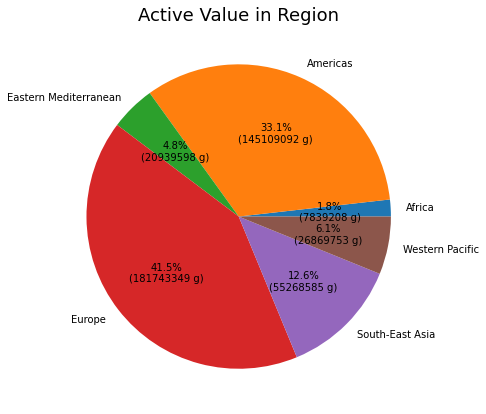

In [117]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig = plt.figure(figsize =(10, 7))
plt.pie(value, labels = df,autopct = lambda pct: func(pct, value))
plt.title("Active Value in Region",fontsize=18)
plt.xticks(rotation=45,fontsize=18)
# show plot
plt.show()

 


In [107]:
activeCountry = country[country['Date'] == country['Date'].max()].iloc[:5]
activeCountry

,Country,Date,Lat,Long,Confirmed,Deaths,Recovered,Active
772,Afghanistan,2022-03-04,33.93911,67.709953,174214,7619,0,166595
1545,Albania,2022-03-04,41.15330,20.168300,272030,3478,0,268552
2318,Algeria,2022-03-04,28.03390,1.659600,265186,6852,0,258334
3091,Andorra,2022-03-04,42.50630,1.521800,38434,151,0,38283
3864,Angola,2022-03-04,-11.20270,17.873900,98796,1900,0,96896


In [108]:
valueCountry=activeCountry.sort_values(by='Active', ascending=False)
valueCountry
dfValue=valueCountry["Country"]
deger=valueCountry["Active"]

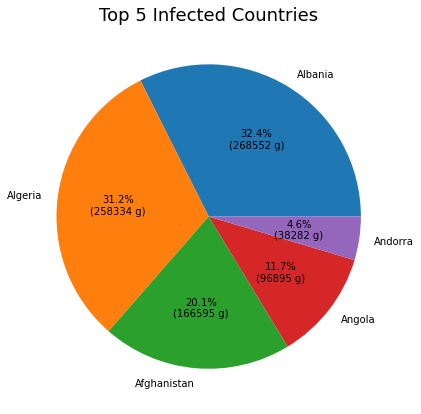

In [116]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig = plt.figure(figsize =(10, 7))
plt.pie(deger, labels = dfValue,autopct = lambda pct: func(pct, deger))
plt.title("Top 5 Infected Countries",fontsize=18)
plt.xticks(rotation=45,fontsize=18)
 
# show plot
plt.show()